# Activity 3 : K Means Clustering using Pew Data

In [51]:
pew_df <- read.csv(file="pew_data.csv",head=TRUE,sep=",")
head(pew_df)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


<p style='color:blue'><font size='4'> The required features are extracted with valid data as shown below </font></p>

In [52]:
library(dplyr)

final_df <- filter(pew_df,race<8,age<98,party<8) %>% select(race,age,state,sex,party) %>% na.omit()
head(final_df)


race,age,state,sex,party
1,47,51,2,3
2,63,24,2,2
1,86,39,2,1
1,40,37,2,1
1,69,20,2,3
1,72,42,1,3


In [53]:
k <- kmeans(final_df,centers=5)    # for k = 5
k$centers


,race,age,state,sex,party
1,1.246324,72.16176,14.80882,1.602941,2.099265
2,1.467606,52.34366,15.18310,1.523944,2.312676
3,1.579221,32.34805,42.86753,1.454545,2.376623
4,1.869258,28.77032,13.03180,1.431095,2.526502
5,1.261426,64.34552,42.53748,1.517367,2.213894


In [54]:
table(k$cluster)


  1   2   3   4   5 
272 355 385 283 547 

## Interpretation:

<p style='color:blue'><font size='4'> For K = 5 centers</font></p>


<p style='color:green'><font size='2'>
Characteristics of each clusters appears to be as follows:<br>
1) age - very old(60s and 70s) majority , democrats majority<br>
2) age - old(50s and 60s) majority, democrats and independents majority<br>
3) age - young(30s ) majority, democrats and independents majority<br>
4) age - very young(20s and 30s) majority and more inclination to independents<br>
5) age - old (60s) majority and democrats majority<br>


All clusters seem to have white population as majority. Gender seems to be uniformly distributed in all clusters.
</font></p>


In [55]:
k <- kmeans(final_df,centers=3)    # for k = 3
k$centers


,race,age,state,sex,party
1,1.413675,61.26838,13.72650,1.548718,2.213675
2,1.667737,29.84591,28.74799,1.449438,2.471910
3,1.294953,62.40852,42.48896,1.518927,2.205047


In [56]:
table(k$cluster)


  1   2   3 
585 623 634 

<p style='color:blue'><font size='4'> For K = 3 centers</font></p>

<p style='color:green'><font size='2'>
Characteristics of each clusters appears to be as follows:<br>
1) age - very old(60s and 70s) majority , democrats majority<br>
2) age - young(20s and 30s) majority, democrats and independents majority<br>
3) age - very old (60s and 70s) majority, democrats majority<br>


All clusters seem to have white population as majority. Gender seems to be uniformly distributed in all clusters.
</font></p>



<p style='color:orange'><font size='3'>Upon analyzing the tables for both k =3,5 ,The data points can be seen non-uniformly distributed for k = 5 when compared to k=3 centers</font></p>

Warning message:
“did not converge in 10 iterations”

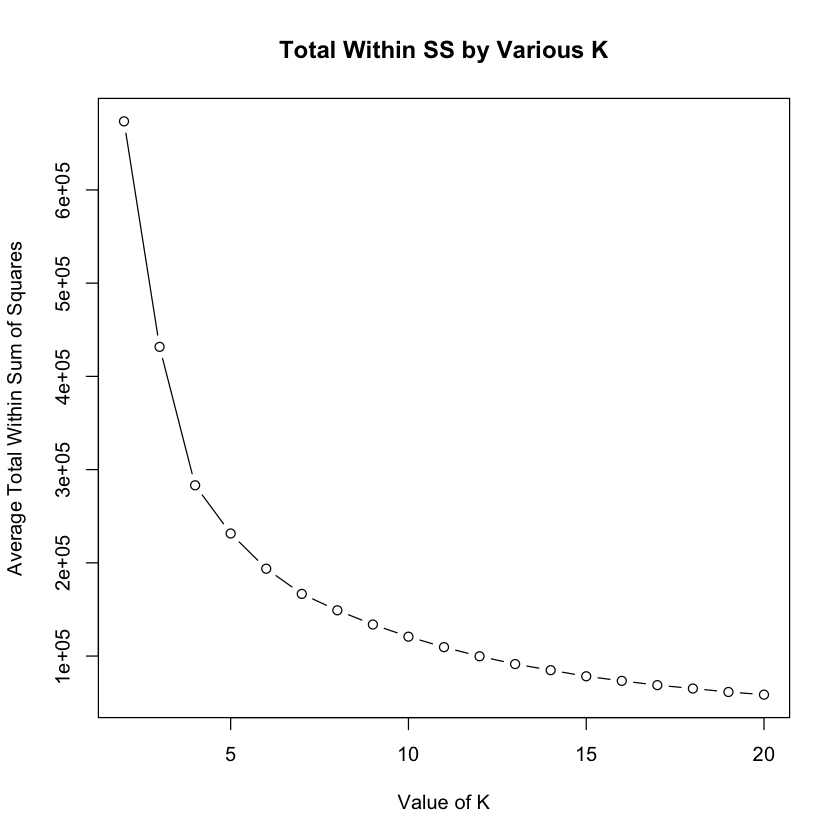

In [61]:
rng <-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
 k.temp <-kmeans(final_df,centers=v) #Run kmeans
 v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")  #source : example in lab 3 - 3